In [39]:
import pyvista as pv 
import numpy as np
import os
from glob import glob
import trimesh as tri
from pyvista import examples
import matplotlib.pyplot as plt

In [145]:
src = os.path.join(os.getcwd(), 'test_models')
all_models = glob(src + '/*.stl')

f = all_models[0]
mesh = pv.read(f)

rot = mesh.rotate_z(90)
#rot.plot(eye_dome_lighting=True)

In [ ]:
res = 0.5


In [150]:
mesh.faces

array([3, 0, 1, ..., 0, 9, 1])

In [151]:
from skimage import measure

verts, faces, normals, values = measure.marching_cubes(stack, 0)
faces


array([[    2,     1,     0],
       [    0,     3,     2],
       [    1,     4,     0],
       ...,
       [92416, 92456, 92411],
       [92459, 92419, 92414],
       [92419, 92459, 92417]], dtype=int32)

In [ ]:
mesh

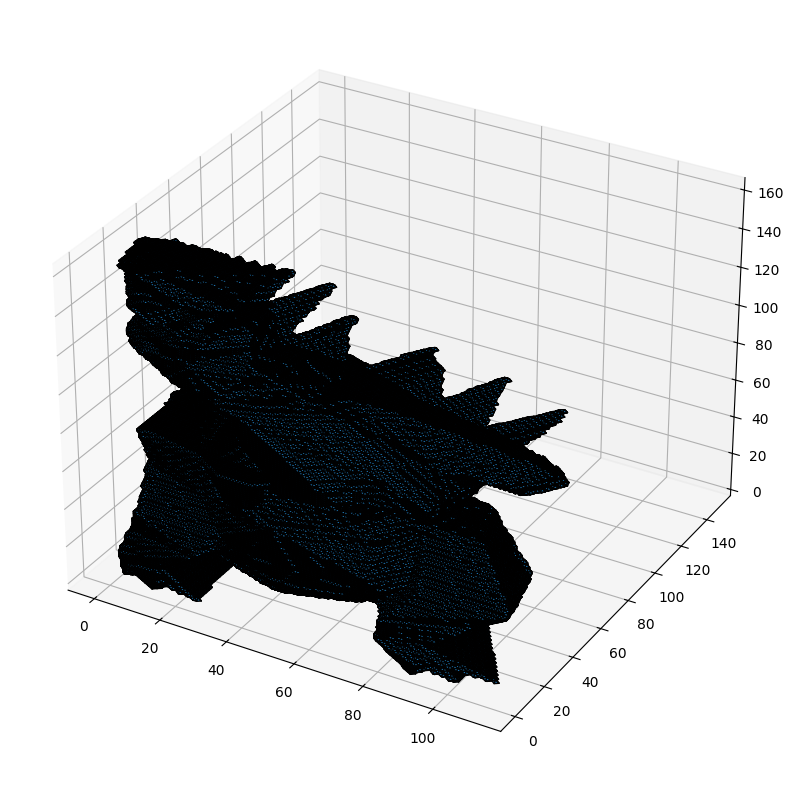

In [144]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Fancy indexing: `verts[faces]` to generate a collection of triangles
mesh = Poly3DCollection(verts[faces])
mesh.set_edgecolor('k')
ax.add_collection3d(mesh)


Voxelize : https://github.com/pyvista/pyvista-support/issues/141 


In [15]:
stdv = 0.005

dec = rot.decimate(0.8)
centers = dec.cell_centers().points
norms = dec.cell_normals
noise_factor = np.random.normal(0, stdv, size=(len(centers),1))
noisy_points = centers + np.multiply(noise_factor, centers)


In [4]:
noisy_pointset = pv.wrap(dec.points)
#noisy_surf = noisy_pointset.reconstruct_surface()
noisy_surf = noisy_pointset.delaunay_3d(alpha=0.09, tol=0.1, offset=1)

In [24]:
vox = pv.voxelize(rot, 0.08, check_surface=False)
vox.plot(eye_dome_lighting=True)

Widget(value='<iframe src="http://localhost:64535/index.html?ui=P_0x33c1beed0_10&reconnect=auto" class="pyvist…

In [16]:
sph = pv.wrap(pv.Sphere(3, center=mesh.center_of_mass()))
sph = sph.triangulate().subdivide(2)
'''
pl = pv.Plotter()
pl.add_mesh(sph)
pl.add_mesh(noisy_surf)
pl.show()
'''

pv.wrap(dec.sample(sph).points).plot()

Widget(value='<iframe src="http://localhost:64535/index.html?ui=P_0x3128a3260_5&reconnect=auto" class="pyvista…

In [17]:
import trimesh 

tmesh = trimesh.load_mesh(f)

In [18]:
tmesh

<trimesh.Trimesh(vertices.shape=(85106, 3), faces.shape=(170172, 3), name=`Kuromi_Character.stl`)>

In [9]:
grid.points

pyvista_ndarray([[-1.80009806, -1.03760827, -1.91730738],
                 [-1.80009806, -0.97829416, -1.91730738],
                 [-1.80009806, -0.91898005, -1.91730738],
                 ...,
                 [ 1.7587483 ,  1.15701366,  2.17536594],
                 [ 1.7587483 ,  1.21632776,  2.17536594],
                 [ 1.7587483 ,  1.27564187,  2.17536594]])

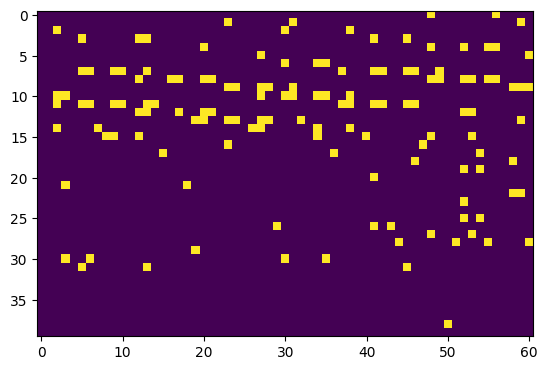

In [10]:
import matplotlib.pyplot as plt

plt.imshow(mask[:,:, 20])